# Food shortage in Africa? Examining the data

#### Food shortage occur when food supply in a bounded region do not provide the energy and nutrient needed by that region's population. Food shortage is majorly a production problem. Food shortage could also be influenced by importing and exporting.

In [1]:
#IMPORTING THE AFRICA FOOD PRODUCTION DATASET
import pandas as pd
productionDataset = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv')

In [2]:
#CONVERTING THE YEAR COLUMN TO DATE OBJECT
productionDataset1= pd.DataFrame(productionDataset)
productionDataset1['Year'] = pd.to_datetime(productionDataset['Year'], format = '%Y').dt.year
#CONVERTING THE VALUE COLUMN TO KILOTONNE(KT)
productionDataset1['Value'] = (productionDataset ['Value'].astype('int64')). astype(str)+ ' kt'
print(productionDataset1)

        Country                Item  Year    Value
0       Algeria  Wheat and products  2004  2731 kt
1       Algeria  Wheat and products  2005  2415 kt
2       Algeria  Wheat and products  2006  2688 kt
3       Algeria  Wheat and products  2007  2319 kt
4       Algeria  Wheat and products  2008  1111 kt
...         ...                 ...   ...      ...
23105  Zimbabwe         Crustaceans  2009     0 kt
23106  Zimbabwe         Crustaceans  2010     0 kt
23107  Zimbabwe         Crustaceans  2011     0 kt
23108  Zimbabwe         Crustaceans  2012     0 kt
23109  Zimbabwe         Crustaceans  2013     0 kt

[23110 rows x 4 columns]


In [3]:
#GROUP DATASET BY COUNTRY AND REMOVE THE VALUE UNIT 'KT' TO ENABLE CALCULATIONS
prod_data = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv')
prod_data['Year'] = pd.to_datetime(prod_data['Year'], format = '%Y').dt.year
prod_data = pd.DataFrame(prod_data.groupby(['Country', 'Year'],as_index=False).sum())
print(prod_data)

      Country  Year  Value
0     Algeria  2004  15536
1     Algeria  2005  15667
2     Algeria  2006  16417
3     Algeria  2007  14763
4     Algeria  2008  13841
..        ...   ...    ...
445  Zimbabwe  2009   5754
446  Zimbabwe  2010   6777
447  Zimbabwe  2011   7551
448  Zimbabwe  2012   8173
449  Zimbabwe  2013   7914

[450 rows x 3 columns]


In [4]:
#CHECKING FOR DATA TYPES
prod_data.dtypes

Country    object
Year        int64
Value       int64
dtype: object

In [5]:
#CHECKING FOR DUPLICATES
prod_data.duplicated().any() 

False

[Text(0.5, 1.0, 'Visual rep of food production Data using lineplot')]

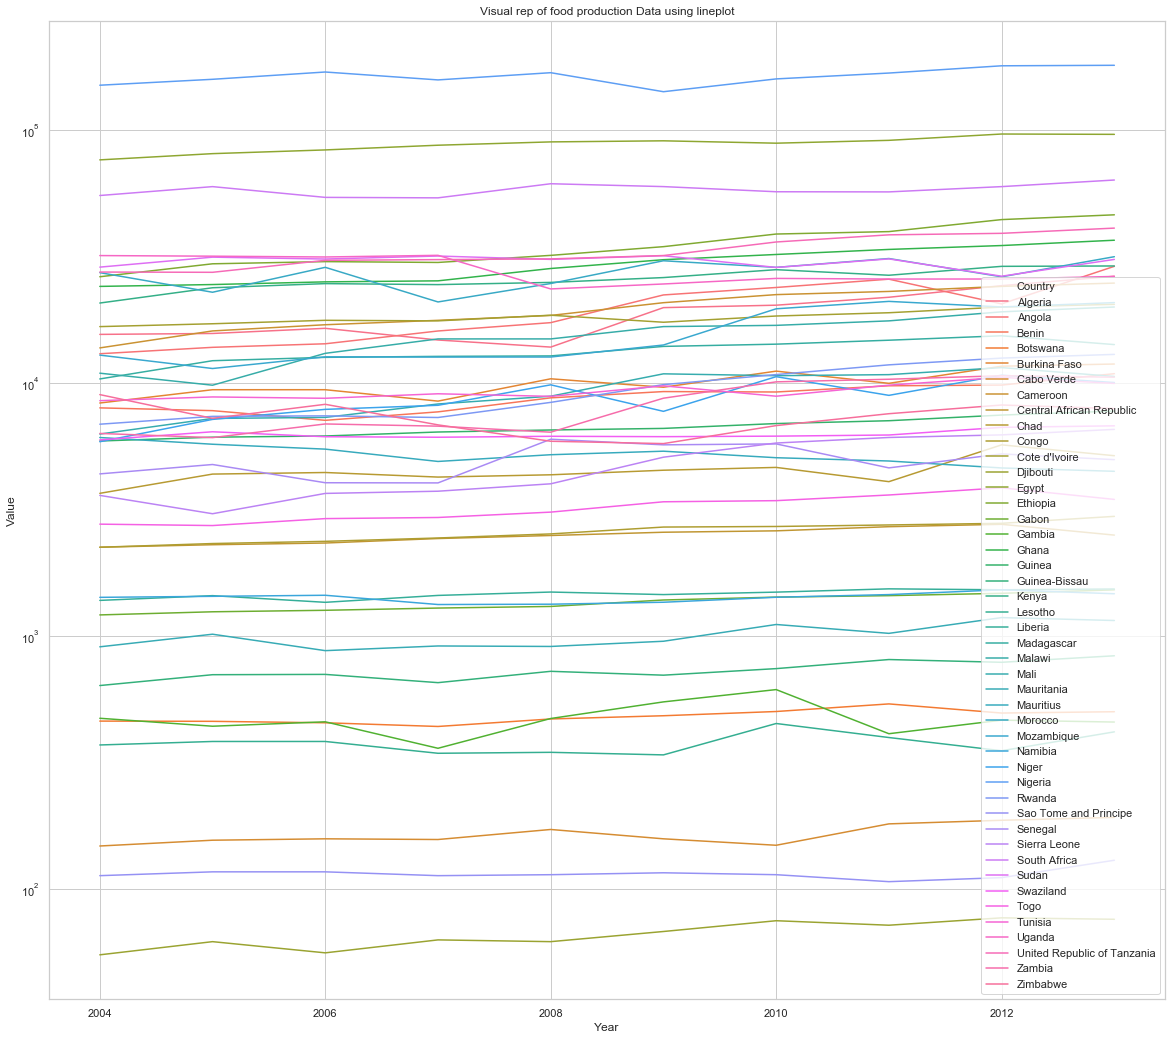

In [6]:
#PLOTTING A LINE PLOT TO VISUALIZE THE FOOD PRODUCTION DATA
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,18))
sns.set(style = "whitegrid")
prod_datafig1 = sns.lineplot(x = "Year", y= "Value", hue= "Country", legend="full",data= prod_data)
prod_datafig1.set(yscale='log')
prod_datafig1.set(Title='Visual rep of food production Data using lineplot')

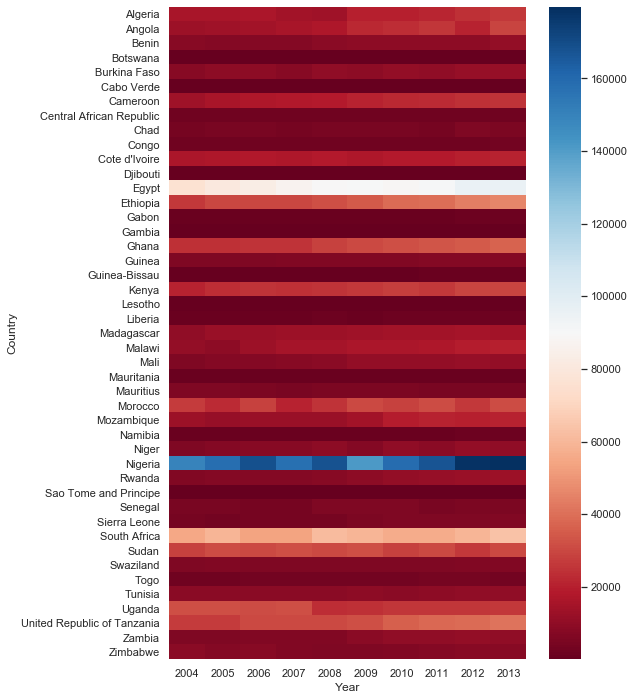

In [7]:
#PLOTING A HEATMAP TO FURTHER CLARIFY TRENDS
prod_datafig2 = pd.pivot_table(prod_data, values= 'Value', index=['Country'], columns='Year')
plt.figure(figsize=(8,12))
sns.heatmap(prod_datafig2, cmap="RdBu")

In [8]:
prod_data.describe(include='all')

Country         Year          Value
count        450   450.000000     450.000000
unique        45          NaN            NaN
top     Cameroon          NaN            NaN
freq          10          NaN            NaN
mean         NaN  2008.500000   16833.591111
std          NaN     2.875478   27707.501219
min          NaN  2004.000000      55.000000
25%          NaN  2006.000000    2299.250000
50%          NaN  2008.500000    7884.500000
75%          NaN  2011.000000   20712.750000
max          NaN  2013.000000  179631.000000

In [9]:
prod_data.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

### *The above visualizations shows that 'Nigeria' produces so much more food compared to all other countries except 'Egypt' who takes the second position on the list. 
### *To ensure that Nigeria is not pushing other countries below the mean by its seemingly high production value, I will be plotting a box plot next to visualize the production data to check for outliers.
### *I would then use the z score to compare the result given by the boxplot.

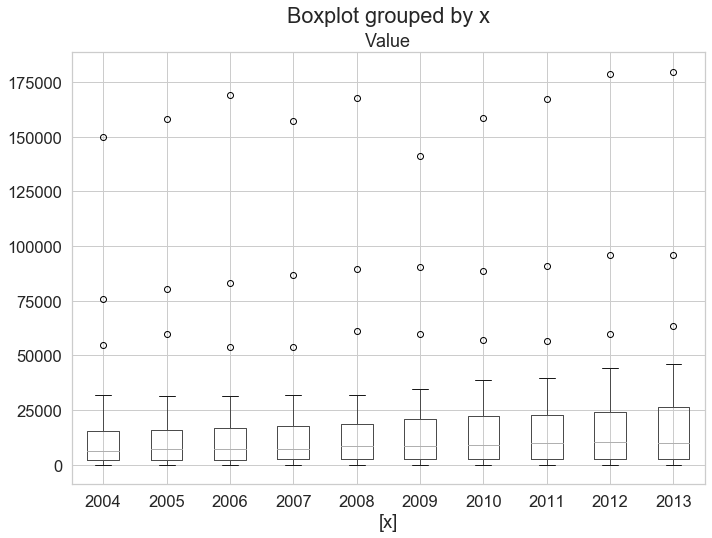

In [10]:
#PLOTTING A BOX PLOT SHOWING PRODUCTION VALUES GROUPED BY YEARS
sns.set(rc={'figure.figsize':(11,8)},font_scale=1.5,style='whitegrid')
prod_datafig3= pd.DataFrame(prod_data, columns=['Value'])
prod_datafig3['x']= pd.DataFrame(prod_data, columns=['Year'])
prod_datafig3.boxplot(by='x')

In [11]:
from scipy import stats
import numpy as np
prod_data1= pd.DataFrame(prod_data, columns=['Value','Year'])
z= np.abs(stats.zscore(prod_data1))
print(z)

[[4.68838845e-02 1.56669890e+00]
 [4.21506609e-02 1.21854359e+00]
 [1.50520525e-02 8.70388280e-01]
 [7.48135169e-02 5.22232968e-01]
 [1.08126739e-01 1.74077656e-01]
 [1.07903367e-01 1.74077656e-01]
 [1.23909611e-01 5.22232968e-01]
 [1.78648800e-01 8.70388280e-01]
 [2.66376028e-01 1.21854359e+00]
 [3.44167100e-01 1.56669890e+00]
 [1.37501631e-01 1.56669890e+00]
 [1.09210684e-01 1.21854359e+00]
 [9.28431243e-02 8.70388280e-01]
 [2.92155918e-02 5.22232968e-01]
 [1.64184647e-02 1.74077656e-01]
 [1.95486069e-01 1.74077656e-01]
 [2.51887306e-01 5.22232968e-01]
 [3.19344775e-01 8.70388280e-01]
 [1.32653429e-01 1.21854359e+00]
 [4.34423532e-01 1.56669890e+00]
 [3.20507566e-01 1.56669890e+00]
 [3.27697730e-01 1.21854359e+00]
 [3.51327717e-01 8.70388280e-01]
 [3.30768906e-01 5.22232968e-01]
 [2.93047643e-01 1.74077656e-01]
 [2.74548326e-01 1.74077656e-01]
 [2.75812928e-01 5.22232968e-01]
 [2.56482587e-01 8.70388280e-01]
 [2.54242436e-01 1.21854359e+00]
 [2.15617886e-01 1.56669890e+00]
 [5.915659

In [12]:
threshold=3
print(np.where(z>3))

(array([310, 311, 312, 313, 314, 315, 316, 317, 318, 319], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [13]:
prod_data.iloc[310]

Country    Nigeria
Year          2004
Value       149857
Name: 310, dtype: object

In [14]:
prod_data.iloc[315]

Country    Nigeria
Year          2009
Value       141270
Name: 315, dtype: object

In [15]:
prod_data.iloc[319]

Country    Nigeria
Year          2013
Value       179631
Name: 319, dtype: object

In [16]:
#DROPPING OUTLIERS
prod_data_without_outlier = prod_data[(z<3).all(axis=1)]

In [17]:
#PRINTING THE SIZE OF THE OLD AND NEW DATA TO VALIDATE THAT OUTLIERS HAVE BEEN REMOVED
print(prod_data.shape)

(450, 3)


In [18]:
print(prod_data_without_outlier.shape)

(440, 3)


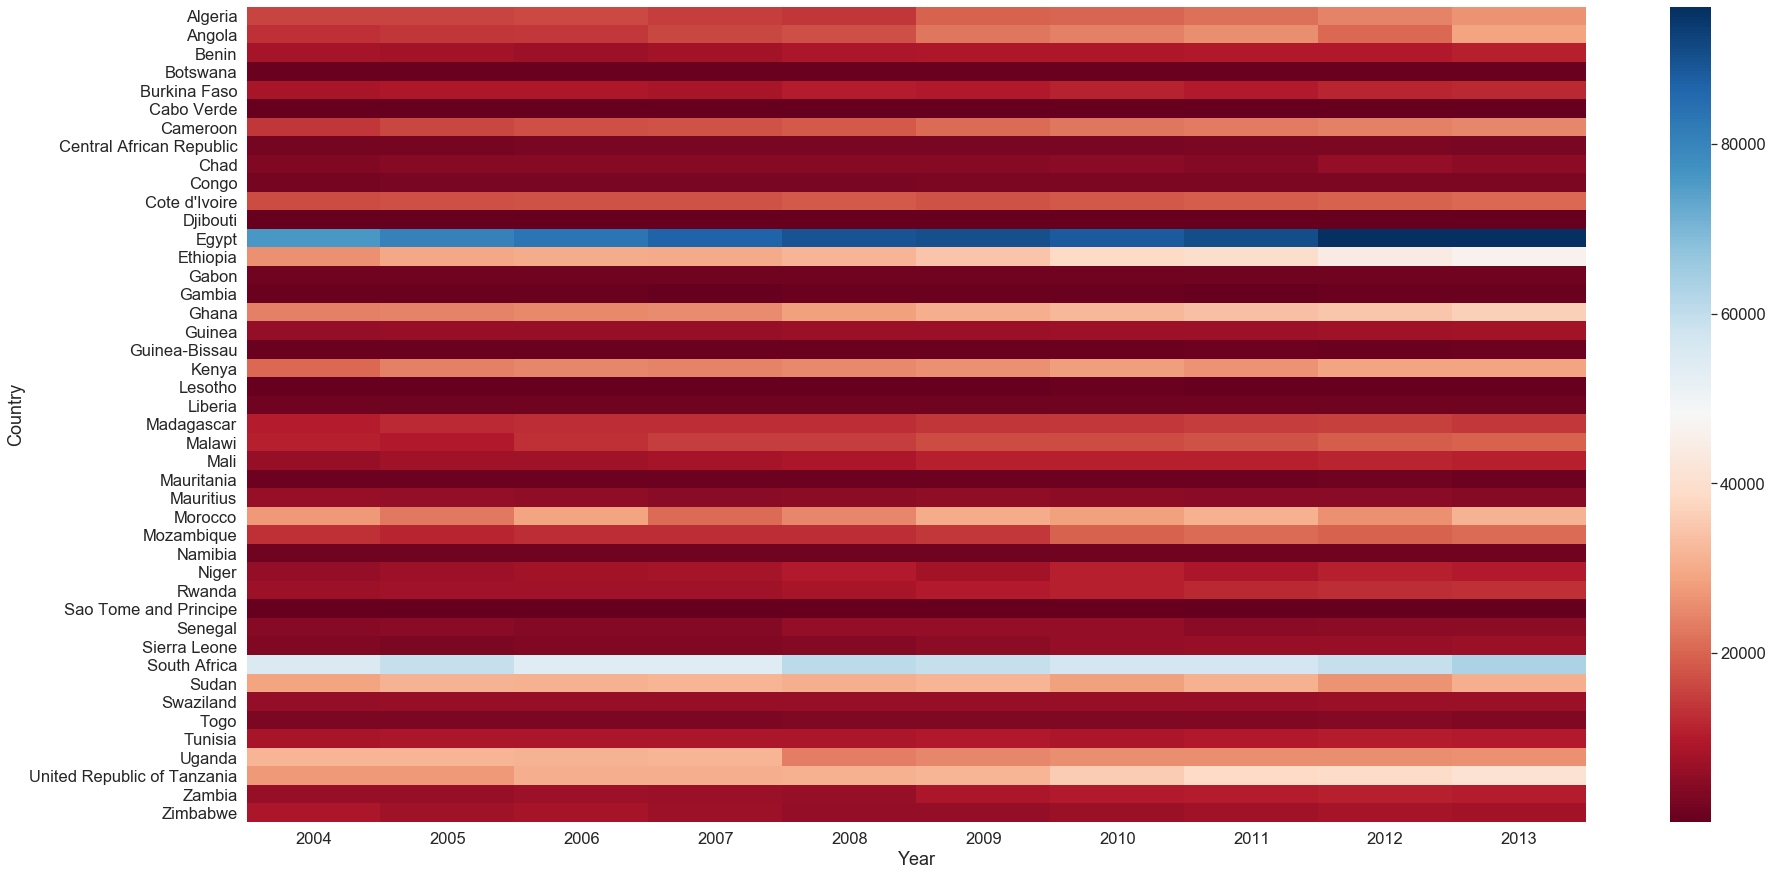

In [19]:
#PLOTING NEW HEAT MAP WITHOUT OUTLIERS FOR THE PRODUCTION DATA
prod_data_without_outlierfig = pd.pivot_table(prod_data_without_outlier, values= 'Value', index=['Country'], columns='Year')
plt.figure(figsize=(30,15))
sns.heatmap(prod_data_without_outlierfig, cmap="RdBu")

In [20]:
prod_data_without_outlier.describe(include='all')

Country         Year         Value
count        440   440.000000    440.000000
unique        44          NaN           NaN
top     Cameroon          NaN           NaN
freq          10          NaN           NaN
mean         NaN  2008.500000  13516.104545
std          NaN     2.875551  16905.271296
min          NaN  2004.000000     55.000000
25%          NaN  2006.000000   2064.500000
50%          NaN  2008.500000   7615.000000
75%          NaN  2011.000000  19844.750000
max          NaN  2013.000000  96139.000000

### *Although, there is a difference between the standard deviation and mean values of the production dataset after the outlier has been removed, the heatmap visualization now seems to make Egypt look like it has outlier values. 
### *This however, did not improve the rating of other countries. All other countries still seem to have very low values while Egypt and South Africa still remain the 2 countries apart from Nigeria with high production values.

### *Therefore I choose to retain Nigeria production values because they do not have an overall effect on the entire production dataset.

In [21]:
#IMPORTING THE FOOD CONSUMPTION DATASET
import pandas as pd
consumptionData=pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv')
print(consumptionData)

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


In [22]:
consumptionData['Year'] = pd.to_datetime(consumptionData['Year'], format = '%Y').dt.year
consumptionData = pd.DataFrame(consumptionData.groupby(['Country', 'Year'],as_index=False).sum())
print(consumptionData)

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


In [23]:
consumptionData.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [24]:
consumptionData.duplicated().any() 

False

In [25]:
consumptionData.describe(include='all')

Country         Year        Value
count        450   450.000000   450.000000
unique        45          NaN          NaN
top     Cameroon          NaN          NaN
freq          10          NaN          NaN
mean         NaN  2008.500000  2469.775556
std          NaN     2.875478   379.140143
min          NaN  2004.000000  1781.000000
25%          NaN  2006.000000  2174.000000
50%          NaN  2008.500000  2376.000000
75%          NaN  2011.000000  2681.750000
max          NaN  2013.000000  3561.000000

[None]

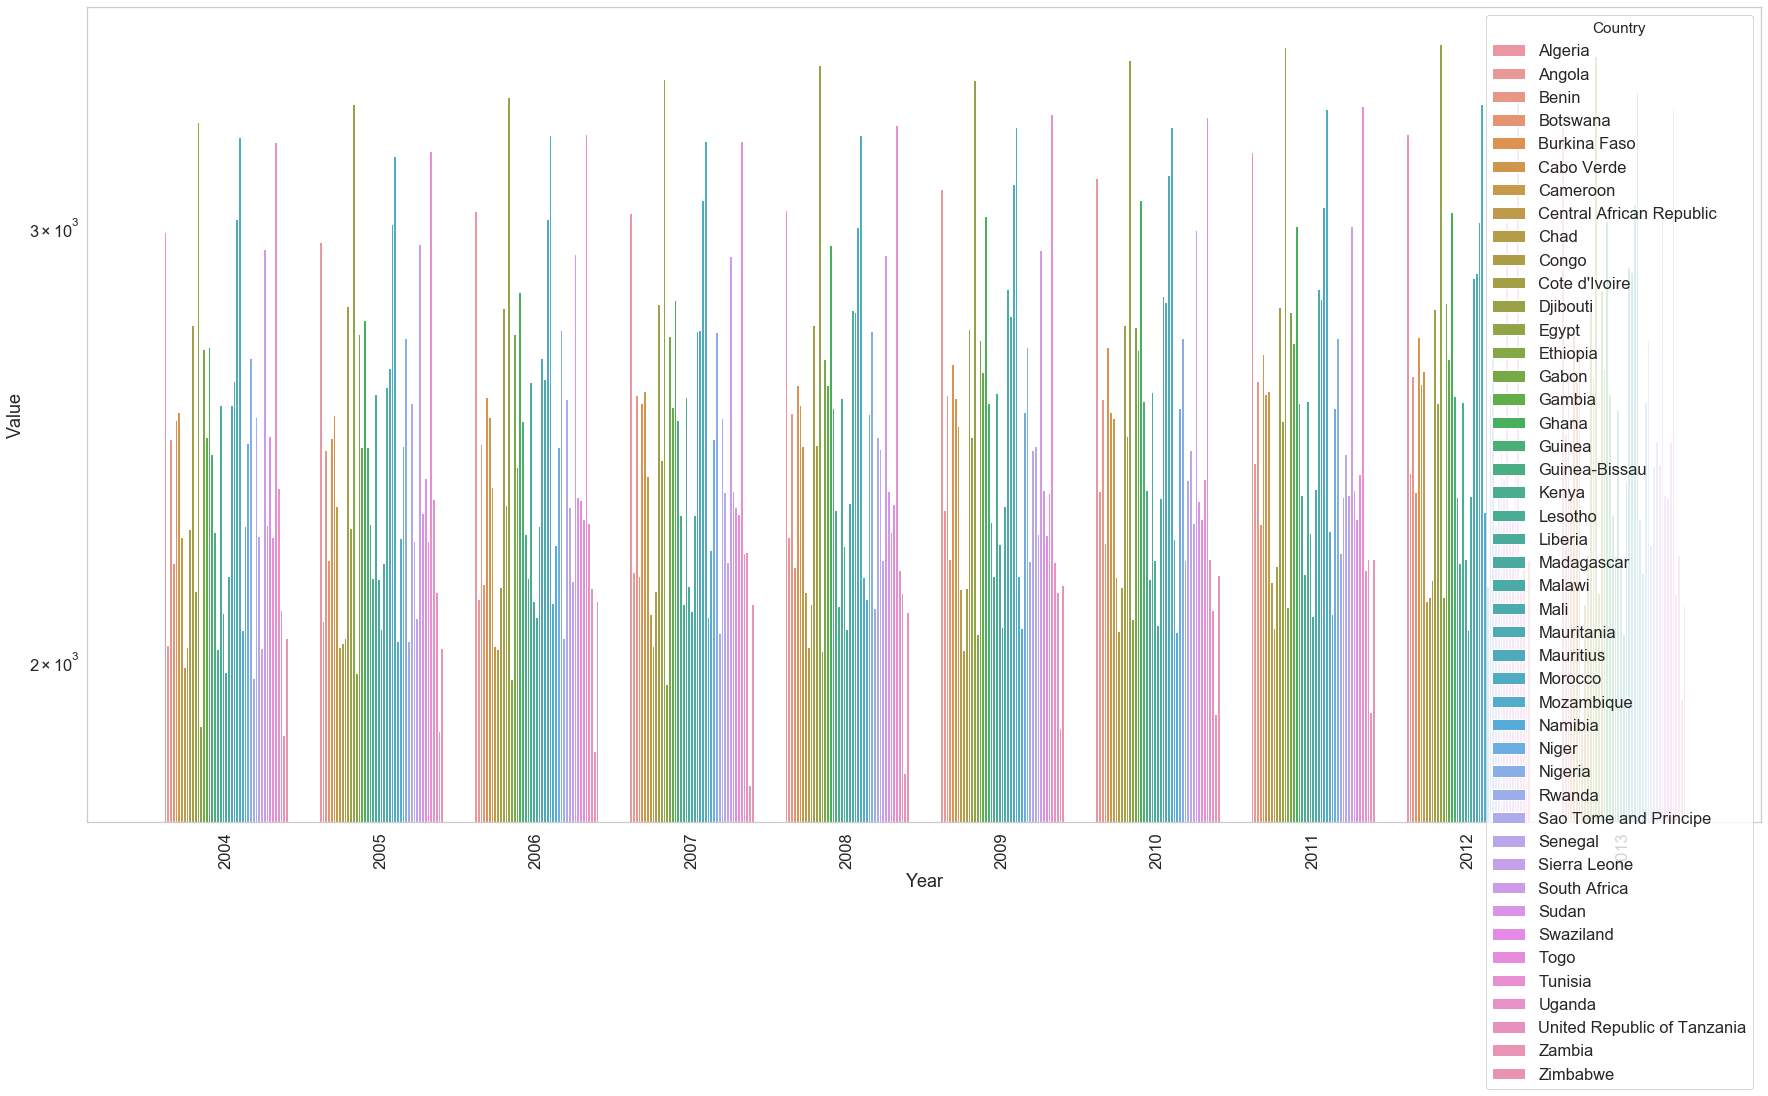

In [26]:
#PLOTTING A BAR GRAPH TO VISUALIZE CONSUMPTION DATA
plt.figure(figsize=(30,15))
consumptionDatafig1 = sns.barplot(x="Year", y="Value", hue="Country", data=consumptionData)
plt.xticks(rotation='vertical')
consumptionDatafig1.plot(kind='bar', stacked=True)
consumptionDatafig1.set(yscale='log')

### The bar chart does not show a lot except that there is a similarity in the consumption trend throughout the years. 
### I will plot a heat map for better understanding of the data

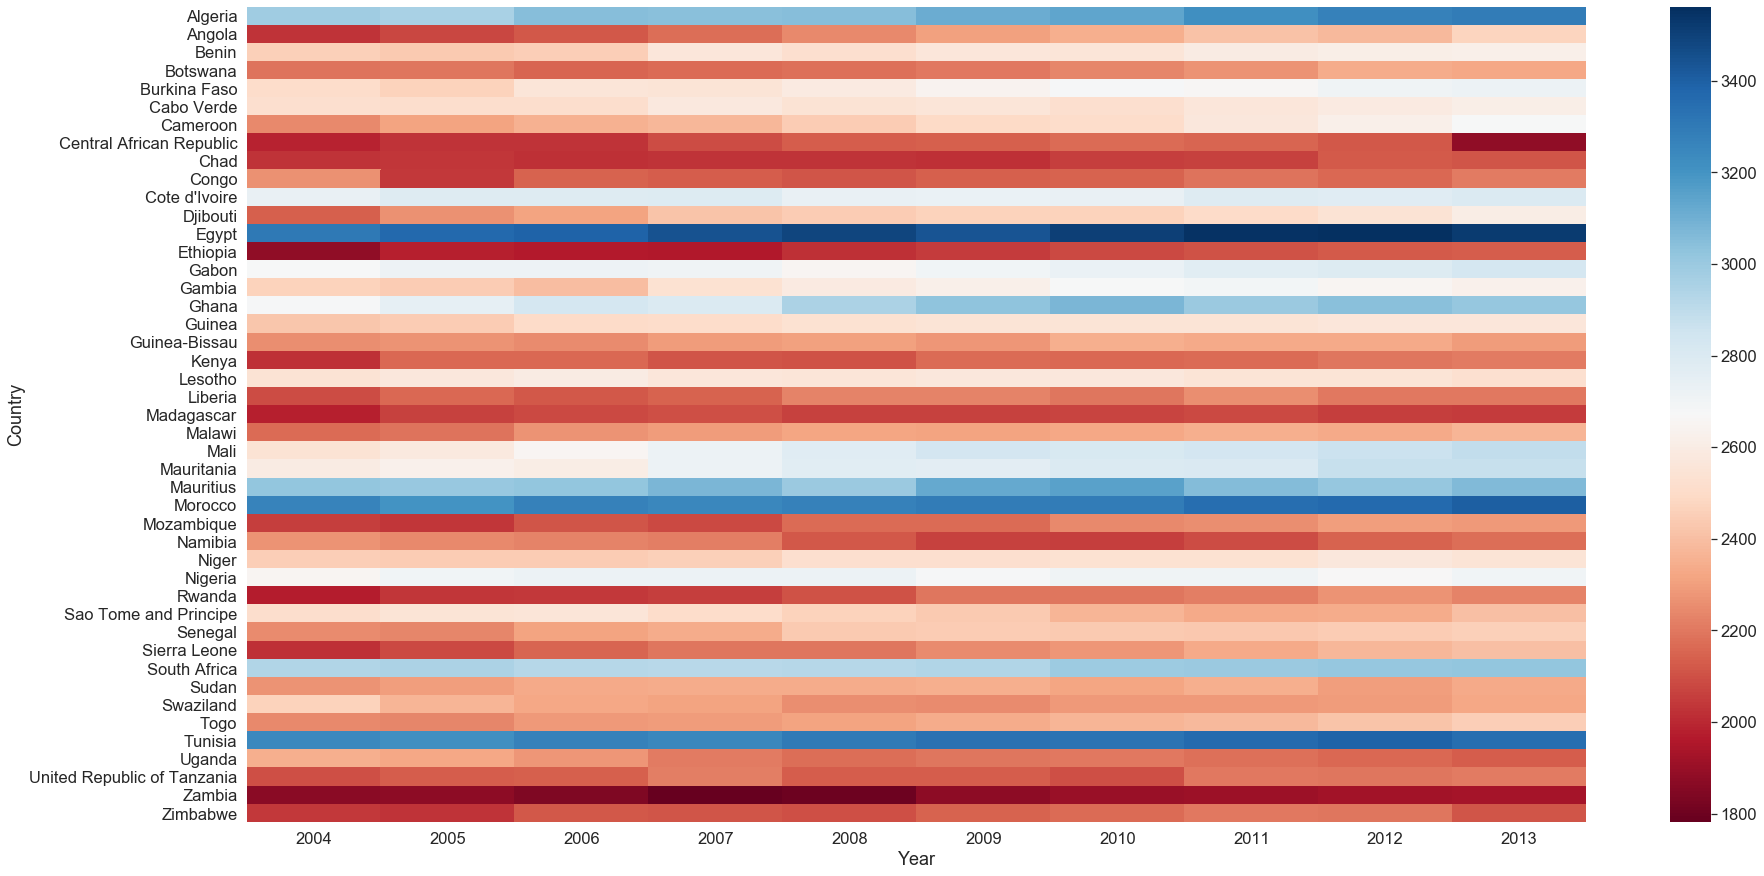

In [27]:
#HEAT MAP REPRESENTATION OF CONSUMPTION DATA
consumptionDatafig2 = pd.pivot_table(consumptionData, values= 'Value', index=['Country'], columns='Year')
plt.figure(figsize=(30,15))
sns.heatmap(consumptionDatafig2, cmap="RdBu")

### *The heat map shows that many countries rank high on food consumption compared to food production. 
### *With a standard deviation of 379, the values within the consumption data set all seem to be close to the mean. The average value is 2469 and the maximum value is 3561.  
### *Also, the map above shows that every country irrespective of how little, consumed more food over the years and some countries experienced flunctuations but Central African Republic stands out as it experiences a rather drastic decline in food consumption in 2013. 
### *Next, I will be plotting a line graph to further observe this decline

[Text(0.5, 1.0, 'African food supply data between 2004-2013')]

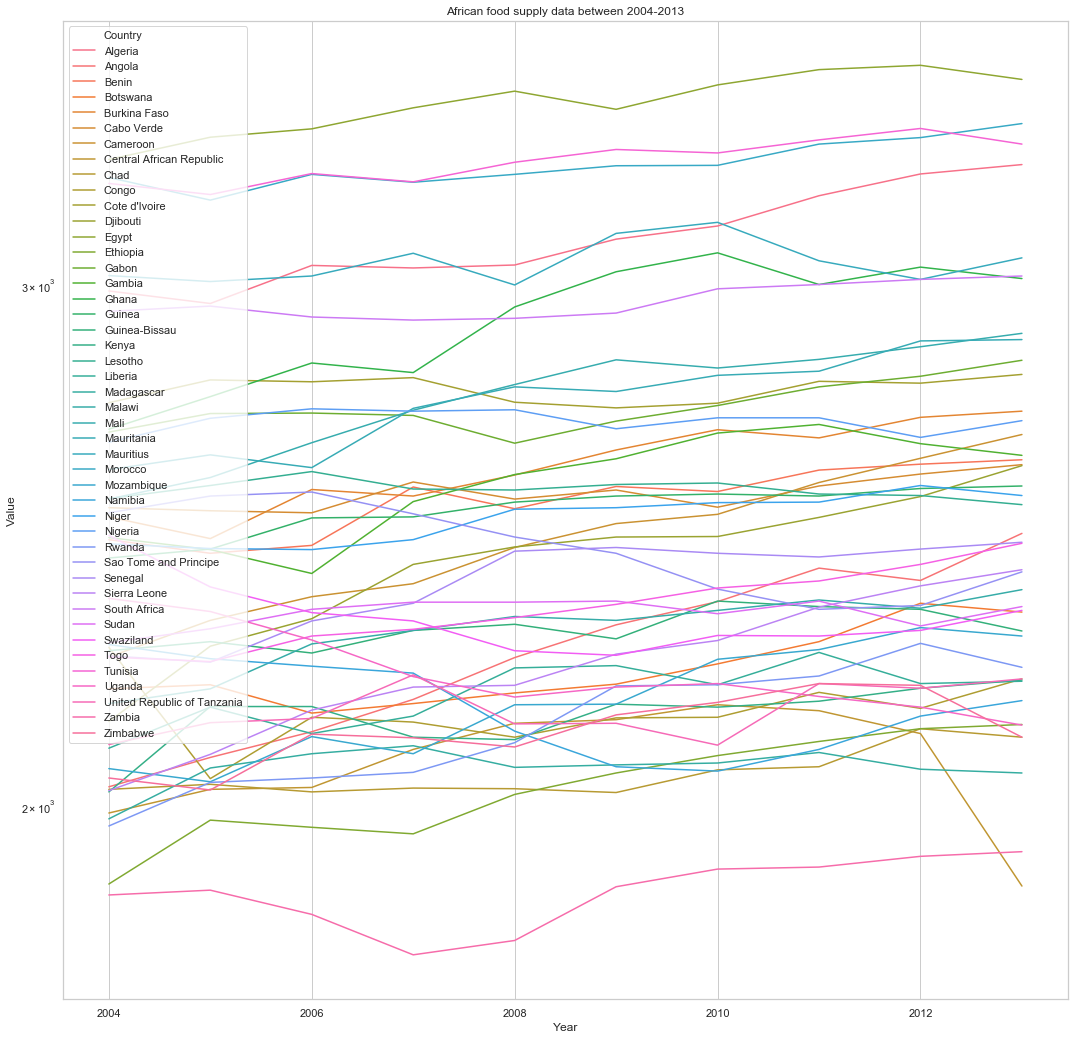

In [28]:
plt.figure(figsize=(18,18))
sns.set(style = "whitegrid")
consumptionDatafig3 = sns.lineplot(x = "Year", y= "Value", hue= "Country",legend="full", data= consumptionData)
consumptionDatafig3.set(yscale='log')
consumptionDatafig3.set(Title='African food supply data between 2004-2013')

### *The line plot above further clarifies the decline experienced by Central African Republic in 2013

In [29]:
#PULLING OUT THE DATA FOR CENTRAL AFRICAN REPUBLIC WITHIN THE CONSUMPTION AND PRODUCTION DATASET
consumptionData.loc[consumptionData['Country'] == 'Central African Republic']

Country  Year  Value
70  Central African Republic  2004   1989
71  Central African Republic  2005   2026
72  Central African Republic  2006   2029
73  Central African Republic  2007   2090
74  Central African Republic  2008   2133
75  Central African Republic  2009   2139
76  Central African Republic  2010   2164
77  Central African Republic  2011   2154
78  Central African Republic  2012   2116
79  Central African Republic  2013   1879

In [30]:
prod_data.loc[prod_data['Country'] == 'Central African Republic']

Country  Year  Value
70  Central African Republic  2004   2242
71  Central African Republic  2005   2293
72  Central African Republic  2006   2329
73  Central African Republic  2007   2426
74  Central African Republic  2008   2494
75  Central African Republic  2009   2569
76  Central African Republic  2010   2602
77  Central African Republic  2011   2702
78  Central African Republic  2012   2761
79  Central African Republic  2013   2503

### Hypothesis 1: There will be no correlation between food consumption and food production in Africa


In [31]:
prod_data.shape
prodtable = pd.pivot_table(data=prod_data,index=['Country', 'Year'])
prodtable

Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]

In [32]:
consumptionData.shape
consumptiontable = pd.pivot_table(data=consumptionData,index=['Country', 'Year'])
consumptiontable

Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

In [33]:
#JOINING THE PRODUCTION AND CONSUMPTION DATASETS
prod_and_supply_data = pd.merge(prod_data, consumptionData, how='left', left_on=['Country', 'Year'], right_on=['Country', 'Year'])
print(prod_and_supply_data)

      Country  Year  Value_x  Value_y
0     Algeria  2004    15536     2987
1     Algeria  2005    15667     2958
2     Algeria  2006    16417     3047
3     Algeria  2007    14763     3041
4     Algeria  2008    13841     3048
..        ...   ...      ...      ...
445  Zimbabwe  2009     5754     2147
446  Zimbabwe  2010     6777     2168
447  Zimbabwe  2011     7551     2200
448  Zimbabwe  2012     8173     2197
449  Zimbabwe  2013     7914     2110

[450 rows x 4 columns]


In [34]:
avg_prod_supply = prod_and_supply_data.groupby('Year').mean()
avg_prod_supply['Value_x'].index

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype='int64', name='Year')

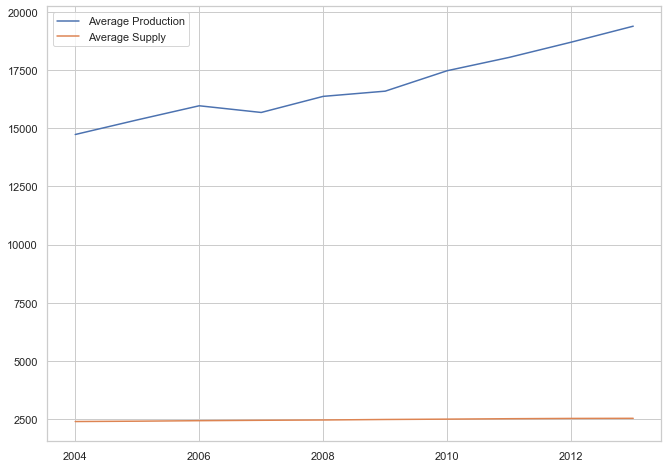

In [35]:
#LINE CHART SHOWING THE AVERAGE PRODUCTION AND CONSUMPTION IN AFRICA BETWEEN 2004 AND 2013
plt.plot(avg_prod_supply['Value_x'].index, avg_prod_supply['Value_x'], label = "Average Production")
plt.plot(avg_prod_supply['Value_y'].index, avg_prod_supply['Value_y'], label = "Average Supply")
plt.legend()
plt.show()

In [36]:
prod_and_supply_corr = prod_and_supply_data['Value_x'].corr(prod_and_supply_data['Value_y'], method='pearson')
prod_and_supply_corr

0.31008466787601663

### *The correlation coefficient of the relationship between food production and food consumption values in Africa = 0.3
### *This indicates a weak relationship between the two values but a positive one. That is both values are moving in the same direction and not inversely
### *The line chart above further explains this as we see that average supply remains steady over the years almost the same value while average production moves steadily upward. They however both move towards the same direction.
### *Therefore our hypothesis is accepted . The correlation coefficient between food consumption and food production in Africa is too weak to be significant.
### *$H_{0}$ is accepted and $H_{1}$ is rejected

## Hypothesis 2: 
### Quantity of food produced in Africa will most likely be low compared to the population

In [37]:
#IMPORTING AFRICA'S POPULATION DATA FROM 2004 TO 2013 
import pandas as pd
population_data = pd.read_excel (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Population data.xlsx')
print(population_data)

     Country Name Country Code      2004      2005      2006      2007  \
0           Aruba          ABW     98737    100031    100834    101222   
1     Afghanistan          AFG  24726684  25654277  26433049  27100536   
2          Angola          AGO  18758145  19433602  20149901  20905363   
3         Albania          ALB   3026939   3011487   2992547   2970017   
4         Andorra          AND     76244     78867     80993     82684   
..            ...          ...       ...       ...       ...       ...   
258        Kosovo          XKX   1704622   1705780   1719536   1733404   
259   Yemen, Rep.          YEM  19540098  20107409  20687646  21282515   
260  South Africa          ZAF  47291610  47880601  48489459  49119759   
261        Zambia          ZMB  11550642  11856247  12173514  12502958   
262      Zimbabwe          ZWE  12019912  12076699  12155491  12255922   

         2008      2009      2010      2011        2012        2013  
0      101358    101455    101669    1020

In [38]:
population_data= pd.melt(population_data,id_vars=['Country Name','Country Code'], var_name='Year')
print(population_data)

      Country Name Country Code  Year       value
0            Aruba          ABW  2004     98737.0
1      Afghanistan          AFG  2004  24726684.0
2           Angola          AGO  2004  18758145.0
3          Albania          ALB  2004   3026939.0
4          Andorra          AND  2004     76244.0
...            ...          ...   ...         ...
2625        Kosovo          XKX  2013   1818117.0
2626   Yemen, Rep.          YEM  2013  25147109.0
2627  South Africa          ZAF  2013  53689236.0
2628        Zambia          ZMB  2013  14926504.0
2629      Zimbabwe          ZWE  2013  13350356.0

[2630 rows x 4 columns]


In [39]:
#GROUPING POPULATION DATA BY COUNTRY NAME 
population_data_grouped = pd.DataFrame(population_data.groupby(['Country Name', 'Country Code', 'Year'],as_index=False).sum())
print(population_data_grouped)

     Country Name Country Code  Year       value
0     Afghanistan          AFG  2004  24726684.0
1     Afghanistan          AFG  2005  25654277.0
2     Afghanistan          AFG  2006  26433049.0
3     Afghanistan          AFG  2007  27100536.0
4     Afghanistan          AFG  2008  27722276.0
...           ...          ...   ...         ...
2625     Zimbabwe          ZWE  2009  12526968.0
2626     Zimbabwe          ZWE  2010  12697723.0
2627     Zimbabwe          ZWE  2011  12894316.0
2628     Zimbabwe          ZWE  2012  13115131.0
2629     Zimbabwe          ZWE  2013  13350356.0

[2630 rows x 4 columns]


In [40]:
#RENAMING "COUNTRY NAME" AND "VALUE" COLUMNS IN POPULATION DATA SO THAT IT WOULD 'MERGE' WITH... 
#...PRODUCTION DATA AND AUTOMATICALLY REMOVE COUNTRIES THAT ARE NOT IN THE PRODUCTION DATASET
column_names={'Country Name': 'Country', 'value': 'Population'}
population_data_grouped=population_data_grouped.rename(columns=column_names)
print(population_data_grouped)

          Country Country Code  Year  Population
0     Afghanistan          AFG  2004  24726684.0
1     Afghanistan          AFG  2005  25654277.0
2     Afghanistan          AFG  2006  26433049.0
3     Afghanistan          AFG  2007  27100536.0
4     Afghanistan          AFG  2008  27722276.0
...           ...          ...   ...         ...
2625     Zimbabwe          ZWE  2009  12526968.0
2626     Zimbabwe          ZWE  2010  12697723.0
2627     Zimbabwe          ZWE  2011  12894316.0
2628     Zimbabwe          ZWE  2012  13115131.0
2629     Zimbabwe          ZWE  2013  13350356.0

[2630 rows x 4 columns]


In [41]:
#MERGE BOTH PRODUCTION AND POPULATION DATASET
prod_and_pop_data = pd.merge(prod_data, population_data_grouped, how="left")
print(prod_and_pop_data)

      Country  Year  Value Country Code  Population
0     Algeria  2004  15536          DZA  32692163.0
1     Algeria  2005  15667          DZA  33149724.0
2     Algeria  2006  16417          DZA  33641002.0
3     Algeria  2007  14763          DZA  34166972.0
4     Algeria  2008  13841          DZA  34730608.0
..        ...   ...    ...          ...         ...
445  Zimbabwe  2009   5754          ZWE  12526968.0
446  Zimbabwe  2010   6777          ZWE  12697723.0
447  Zimbabwe  2011   7551          ZWE  12894316.0
448  Zimbabwe  2012   8173          ZWE  13115131.0
449  Zimbabwe  2013   7914          ZWE  13350356.0

[450 rows x 5 columns]


In [42]:
pip install plotly==4.9.0

Note: you may need to restart the kernel to use updated packages.


In [43]:
#PLOT INTERACTIVE MAP SHOWING THE POPULATION DISTRIBUTION IN AFRICA
import plotly.express as px
plt.figure(figsize=(30,15))
plt.title="Interactive Map plot of Africa's population"
prod_and_pop_datafig1= px.choropleth(prod_and_pop_data, locations= "Country Code", color = "Population", hover_name= "Country", color_continuous_scale= px.colors.sequential.Viridis, animation_frame='Year', scope='africa')
prod_and_pop_datafig1

<Figure size 2160x1080 with 0 Axes>

### *From the plot above, it is worthy of note that Nigeria also stands out in it's population index just as it did for food production
### *The very light blue patches on the map represents the African countries that have been excluded from this data set due to empty values and merging

In [44]:
#TESTING HYPOTHESIS 2
prod_and_pop_data_corr = prod_and_pop_data['Value'].corr(prod_and_pop_data['Population'], method='pearson')
prod_and_pop_data_corr

0.9433015107066206

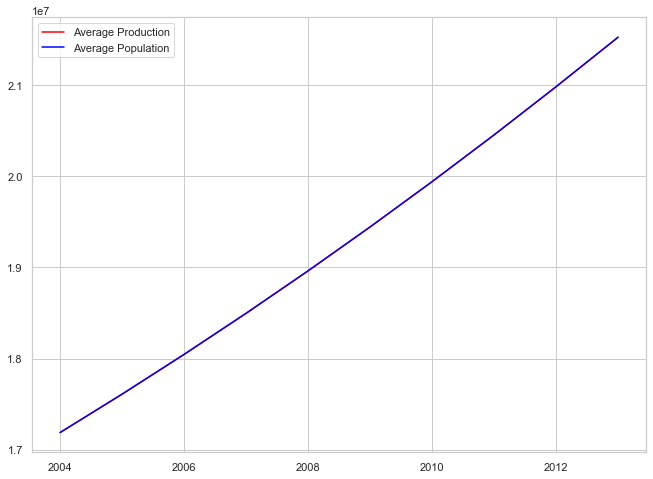

In [45]:
#LINE CHART SHOWING THE AVERAGE POPUULATION AND FOOD PRODUCTION IN AFRICA BETWEEN 2004 AND 2013
avg_pop_prod = prod_and_pop_data.groupby('Year').mean()
avg_pop_prod['Value'].index

plt.plot(avg_pop_prod['Value'].index, avg_pop_prod['Population'], label = "Average Production", color = "red")
plt.plot(avg_pop_prod['Value'].index, avg_pop_prod['Population'], label = "Average Population", color = "blue")
plt.legend()
plt.show()

### *The correlation coefficient of African population and food production is 0.94.
### *The line in the diagram shows a purple colour which implies that both values almost have a perfect correlation. Of course, the blend of 'blue' and 'red' gives 'purple'.
### *To ascertain this, try running both axis independently and both colours would be visible
### *Contrary to the hypothesis stated, there is a strong positive correlation between food production in Africa and the population
### *That is, as population increased over the years (2004-2011), food production also increased in Africa
### *Based on this result, if the trend stays the same, Africa might be able to avoid the problems of food shortage if already the food produced in the region sufficiently caters for the population. 
### *This analysis does not show whether the food produced is enough for the population, further analysis is needed to ascertain that. It only shows that as population increases, more food is being produced in Africa
### *Therefore, $H_{0}$ is rejected and $H_{1}$ is accepted. There is a significance.

# In Conclusion,
### *Further analysis would seek to find out if food produced in Africa can sufficiently feed the population across countries especially Nigeria whose population index is very high, production index equally high but consumption index low.

### *Also, it will  be interesting to find out how food consumption in Africa correlate with it's population because if the correlation between food produced and food consumed is weak, then it would be great to get insight to food consumed in relation to population. The insight would then lead to further analysis
